<a href="https://colab.research.google.com/github/HuyenNguyenHelen/INFO-5505---Machine-learning/blob/main/HuyenNguyen_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1:  Linear Regression
Dataset: monet.csv

Dependent variable: PRICE

In [33]:
# Import primary libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



## Load the dataset

In [34]:
# Open and load dataset
data = pd.read_csv('/content/monet.csv')
print('data shape: ', data.shape)
data.head(5)



data shape:  (430, 6)


,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


## Exploratory Analysis

### Explore missing values

In [35]:
# Investigate missing values
data.isnull().sum()

PRICE      0
HEIGHT     0
WIDTH      0
SIGNED     0
PICTURE    0
HOUSE      0
dtype: int64

It shows that there is no missing values, so we do not need to do any imputing steps.

### Discriptive analysis
By having some discriptive analysis, we could have some sense of how our data vary over each variable in the dataset.

In [36]:
data.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000


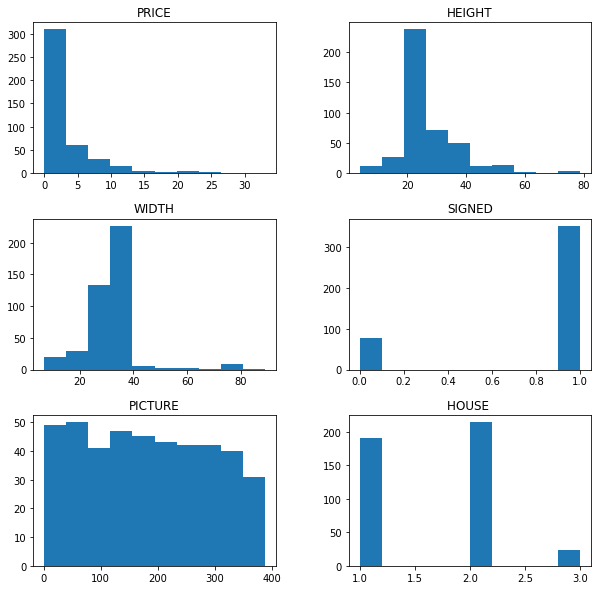

In [37]:
# Plot histograms for each variable to see how they vary
histograms = data.hist(grid=False, figsize=(10, 10))

It is clear that values of the WIDTH and the SALE are not nomally distributed. We may think about normalization for these variables.

### Explore the distribution of the dependent variable - PRICE

In [38]:
# Explore the distribution of the dependent variable - PRICE
data['PRICE'].describe()

count    430.000000
mean       3.089996
std        4.311260
min        0.010413
25%        0.600153
50%        1.312782
75%        3.850000
max       33.013504
Name: PRICE, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


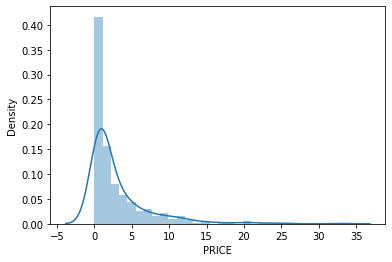

In [39]:
sns.distplot(data['PRICE'], bins = 30)

By looking into the shape of how the dependent variable distributes, we can see most of the density falls between three first bins. There may be some outliers from bin 15.  

### Create a new variable
For the simple LR and multivariate LR that we are going to build, we can create a new variable by combining HEIGHT and WIDTH as sizes of pictures. 
SIZE = HEIGHT * WIDTH


In [40]:
# Create a new variable by combining HEIGHT AND WIDTH
data['SIZE'] = data['HEIGHT'] * data['WIDTH']
data.head(5)

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


### Select independent variables
To select potential predictors for the LR models, we can base on how they are correlated with the target variable. We can visualize their correlations in a heatmap or a scatter plot as follows.

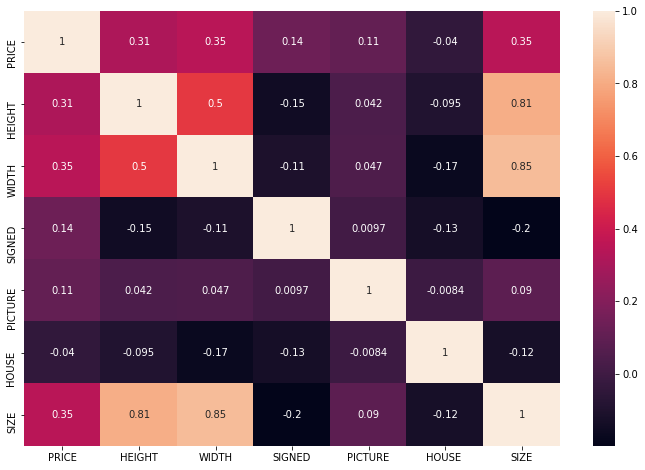

In [41]:
# Plot a heatmap with correlation score
plt.subplots(figsize = (12,8))
sns.heatmap(data.corr(), annot=True)    # get correlation score matrix

The correlation score is from -1 to 1. The score value that is close to -1 shows a strong negative correlation whereas the score close to 1 indicates a strong positive correlation between two variables. If it is close to 0, the two variables are not correlated.

From the heatmap, it seems that no variables are highly correlated with the dependent variable, PRICE. WIDTH and SIZE are most correlated with the same score (0.35), so either of them could be potential predictors of the models. We could use scatter plots to see their correlations more clearly. Note that HEIGHT and WIDTH certainly have co-linearity with SIZE since HEIGHT and WIDTH were combined to create SIZE. Therefore, we will not input either HEIGHT or WIDTH together with SIZE into the training model.

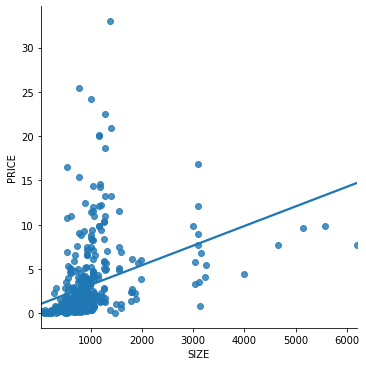

In [42]:
# Plot SIZE and PRICE 
sns.lmplot(x= 'SIZE', y = 'PRICE', data = data, ci = None)

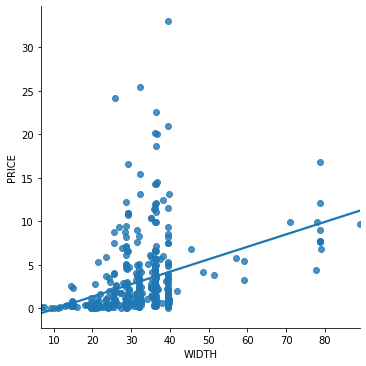

In [43]:
# Plot WIDTH and PRICE
sns.lmplot(x= 'WIDTH', y = 'PRICE', data = data, ci = None)


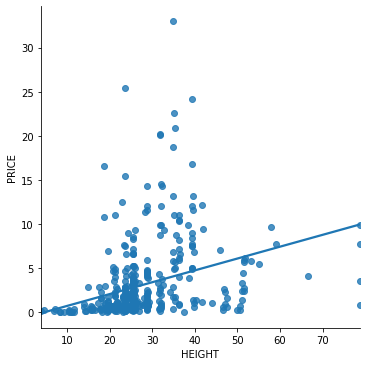

In [44]:
# Plot HEIGHT and PRICE
sns.lmplot(x= 'HEIGHT', y = 'PRICE', data = data, ci = None)

It looks like PRICE increases along with SIZE or WIDTH or HEIGHT; however, there are not exactly clear lines fitted in the data. 

## Linear Regression Models



X: variables known as independent variables, predictors, features

Y: variables known as dependent or target variable 

### Univariate LR Model

Univariate LR or Simple LR models get only one input variable as its single predictor. It has the line fit to data with a form: 
                                  y = ax+b

with a known as coefficient or slope and b as adjustment or intercept.

#### Model 1
Predictor/Indepedent variable (X): SIZE

In [45]:
# Split dataset for training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['SIZE']], data['PRICE'], train_size = 0.8)

print ('Shapes of X_train, y_train: ', X_train.shape, y_train.shape)
print ('Shapes of X_test, y_test: ', X_test.shape, y_test.shape)


Shapes of X_train, y_train:  (344, 1) (344,)
Shapes of X_test, y_test:  (86, 1) (86,)


In [46]:
# Build a LR model
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

# Fit the model into the training data
slr.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Apply the model to predict y in the test set
y_test_pred = slr.predict (X_test) 

# Apply the model to predict y in the train set
y_train_pred = slr.predict(X_train)

In [48]:
# Print coefficient and intercept of the model
print ('Intercept of the model 1: ', slr.intercept_)
print ('Coefficient of the model 1: ', slr.coef_)

Intercept of the model 1:  1.1917179051413447
Coefficient of the model 1:  [0.00204133]


**Model 1 has equation: y = 0.468 + 0.003x**

**Model Evaluation**

To evaluate the performance of LR model, we could use Mean Squared Error (MSE) as Cost Function.
MSE measures how much the model prediction varies from the actual values.

In general, we try to minimize the MSE cost function.


In [49]:
# Evaluate the model performance in the training set
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error (y_train, y_train_pred)
print('Model 1 - Evaluation on MSE:')
print ('-'*30)
print('MSE in the training set: {:.2f}'.format(mse))


# Evaluate the model performance in the testing set
mse = mean_squared_error (y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print('\nMSE in the test set: {:.2f}'.format(mse))
print('\nR2 in the test set: {:.2f}'.format(r2))

Model 1 - Evaluation on MSE:
------------------------------
MSE in the training set: 17.56

MSE in the test set: 11.39

R2 in the test set: 0.23


Obviously, the first model seems to work quite well but its MSE cost function in the train set is still pretty high. We can finetune this model with the goal to decrease its MSE cost function. Looking back the distribution of the dependent variable, we can see it is substantially positively-skewed. For this case, we can try transforming the target variable by applying a logarithmic function for it before training.

The plots below presents how the logarithmic transformation could make the dependent variable less skewed:

Text(0.5, 1.0, 'Transformed target distribution')

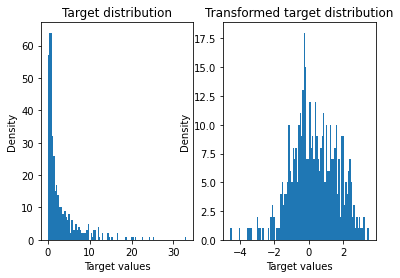

In [50]:
# Plot the original and transformed dependent variable

# original dependent variable
y = data['PRICE'] 

# apply logarithmic function to transform the dependent variable 
y_trans = np.log(y.values.reshape(-1,1))       

f, (ax0, ax1) = plt.subplots(1, 2)

# Plot the original dependent variable
ax0.hist(y, bins=100)
ax0.set_ylabel('Density')
ax0.set_xlabel('Target values')
ax0.set_title('Target distribution')

# Plot the transformed dependent variable
ax1.hist(y_trans, bins=100)
ax1.set_ylabel('Density')
ax1.set_xlabel('Target values')
ax1.set_title('Transformed target distribution')

Similarly, we can try transforming the SIZE independent variable since previously it showed to be positive skewed.

Text(0.5, 1.0, 'Transformed predictor distribution')

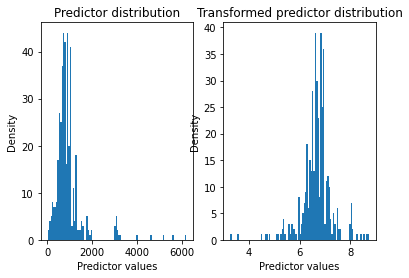

In [51]:
# Plot the original and transformed dependent variable

# original independent variable
x = data['SIZE']

# apply logarithmic function to transform the independent variable 
x_trans = np.log(x.values.reshape(-1,1))      

f, (ax0, ax1) = plt.subplots(1, 2)

# Plot the original dependent variable
ax0.hist(x, bins=100)
ax0.set_ylabel('Density')
ax0.set_xlabel('Predictor values')
ax0.set_title('Predictor distribution')

# Plot the transformed dependent variable
ax1.hist(x_trans, bins=100)
ax1.set_ylabel('Density')
ax1.set_xlabel('Predictor values')
ax1.set_title('Transformed predictor distribution')

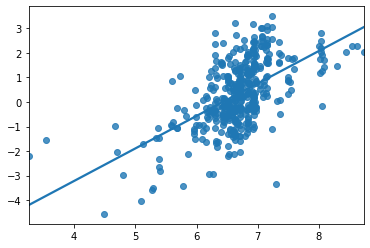

In [52]:
# Plot a scatter plot of the transformed SIZE and the transformed PRICE
sns.regplot(x=x_trans, y=y_trans, ci = None)

The above scatter indicates transformations create a better linear relationship between the two variables.

#### Model 2:
This model is the finetuned by transforming independent and dependent variables of previous model.

X : log(SIZE)

Y: log(PRICE)

In [53]:
from sklearn.compose import TransformedTargetRegressor

# Split data for training (80%) and testing (20%)
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(x_trans, y_trans, train_size = 0.8)
print ('Shape of X_train and y_train: ', X_train.shape, y_train.shape)
print ('Shape of X_test and y_test: ', X_test.shape, y_test.shape)

# Build a LR model
from sklearn.linear_model import LinearRegression
slr_trans = LinearRegression()

# Fit the model into the training data
slr_trans.fit (X_train_trans, y_train_trans)

# Apply the model to predict y in the test set
y_test_trans_pred = slr_trans.predict (X_test_trans) 

# Apply the model to predict y in the train set
y_train_trans_pred = slr_trans.predict(X_train_trans)

# Evaluate the model performance in the training set
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error (y_train_trans, y_train_trans_pred)

print ('\nModel 2 - evaluation on MSE: ')
print ('-'*30)
print('MSE in the training set: {:.2f}'.format(mse_train))

# Evaluate the model performance in the testing set
mse_test = mean_squared_error (y_test_trans, y_test_trans_pred)
print('\nMSE in the test set: {:.2f}'.format(mse_test))


Shape of X_train and y_train:  (344, 1) (344,)
Shape of X_test and y_test:  (86, 1) (86,)

Model 2 - evaluation on MSE: 
------------------------------
MSE in the training set: 1.20

MSE in the test set: 1.27


In [54]:
# Print intercept and coefficient of the model
print ('Intercept of the model 2: ', slr_trans.intercept_)
print('Coefficient of the model 2: ', slr_trans.coef_)

Intercept of the model 2:  [-8.28189833]
Coefficient of the model 2:  [[1.2921946]]


***Conclusion: Based on MSE of the above simple LR models, we found that the model 2, which has the transformed SIZE and the transformed PRICE as independent and dependent variables, achieved the best performance. ***

### Multivariate LR Model
Multivariate LR has more than one predictors.
For our given dataset, the variables which are likely predictors are the SIZE,  the HOUSE, and the SIGNED. The HEIGHT and WIDTH variables are multicolinear with SIZE as mentioned previously, and PICTURE contains unique values. Therefore, they will not be used in the model. 

The SIGNED and HOUSE variables contain discrete values:

In [55]:
# Explore the two discrete variables, SIGNED and HOUSE
var_names = [ 'SIGNED', 'HOUSE ']
for name in var_names: 
  print(name,'\n','-'*25)
  print(data[name].value_counts(),'\n')
  

SIGNED 
 -------------------------
1    353
0     77
Name: SIGNED, dtype: int64 

HOUSE  
 -------------------------
2    215
1    191
3     24
Name: HOUSE , dtype: int64 



The SIGNED is a binary variable, but the HOUSE variable has three classes. We still can use discrete variables for LR, but we need to do dummy coding before inputing into the LR model.

In [56]:
# Create dummy columns of the HOUSE variable
dummies = pd.get_dummies(data['HOUSE '], prefix='HOUSE')

# Join the dummy columns with the dataset
data=data.join(dummies)
display(data)

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE,HOUSE_1,HOUSE_2,HOUSE_3
0,3.993780,21.3,25.6,1,1,1,545.28,1,0,0
1,8.800000,31.9,25.6,1,2,2,816.64,0,1,0
2,0.131694,6.9,15.9,0,3,3,109.71,0,0,1
3,2.037500,25.7,32.0,1,4,2,822.40,0,1,0
4,1.487500,25.7,32.0,1,4,2,822.40,0,1,0
...,...,...,...,...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1,1008.64,1,0,0
426,9.352500,25.9,39.6,1,375,2,1025.64,0,1,0
427,8.252500,25.6,39.6,1,375,1,1013.76,1,0,0
428,3.410000,25.6,39.4,1,386,2,1008.64,0,1,0


As mentioned previously, since the SIZE independent variable and PRICE dependent variable are positively skewed, we will use their logarithmicaly-transformed values.

In [57]:
# Prepare data

# add the transformed SIZE variable into the dataset
data['SIZE_log']=x_trans

X = data[['SIZE_log', 'SIGNED', 'HOUSE_1', 'HOUSE_2', 'HOUSE_3']]
y = y_trans
print('X shape and y shape: ', X.shape, y.shape)

X shape and y shape:  (430, 5) (430, 1)


In [58]:
# Split data for training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 )

print ('Shape of X_train and y_train: ', X_train.shape, y_train.shape)
print ('Shape of X_test and y_test: ', X_test.shape, y_test.shape)

Shape of X_train and y_train:  (344, 5) (344, 1)
Shape of X_test and y_test:  (86, 5) (86, 1)


In [59]:
# Build a multivariate LR model
mlr=LinearRegression()

# Fit the built model into training set
mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# Apply the model to predict the PRICE in the test set
y_test_pred = mlr.predict(X_test)

# Apply the model to predict the PRICE in the training set
y_train_pred = mlr.predict(X_train)

In [61]:
# Evaluate the model performance in the training set
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error (y_train, y_train_pred)

print ('\nMultivariate LR model - Evaluation on MSE: ')
print ('-'*40)
print('MSE in the training set: {:.2f}'.format(mse_train))

# Evaluate the model performance in the testing set
mse_test = mean_squared_error (y_test, y_test_pred)
print('\nMSE in the test set: {:.2f}'.format(mse_test))



Multivariate LR model - Evaluation on MSE: 
----------------------------------------
MSE in the training set: 0.95

MSE in the test set: 1.05


The model performed very well on low MSE scores. However, the model achieved a lower (better) MSE on the test set than on the traning set. This leaves some thoughts about underfitting. However, generally, low MSE indicates good performance of the model. 

In [62]:
# Print coefficients and intercepts of the model
print ('Intercept of the multivariate model: ', mlr.intercept_)
print('Coefficient of the multivariate model: ', mlr.coef_)

Intercept of the multivariate model:  [7.4690635e+13]
Coefficient of the multivariate model:  [[ 1.29325385e+00  1.09188002e+00 -7.46906350e+13 -7.46906350e+13
  -7.46906350e+13]]
